                                                    PROJECT GROUP 43 MILESTONE 2

Group members:

Stefania Diamante Conte, 2739767

Wiktor Krawczyk, 2744706

Francesca Urgese, 2336482

Jan Korczyński, 2730097 

francescaurgese99@gmail.com

INTRODUCTION

Governments have always been fighting against drugs addiction, as it has severe consequences on public health and adverse effects on citizens. Through prevention campaigns, they have always tried to spread awareness among new generations about the risks of physical and mental permanent damages.

According to studies, drug addicts are prone to developing multiple health disorders at the same time. Some of these include cancer, mental illness, and heart disease. Besides regular medical tests, other procedures such as blood tests and imaging scans can also be performed to check the effects of drug use on the body. The most common example is the cigarette smoking addiction, that may contribute to the possibility of being affected by cancer, but also the methamphetamine use, that causes severe dental issues, and last, but not least, opioid, that can lead to overdose and death.

In order to provide both tools, in the form of an ontology and general information about which drugs have an affect on which illness, in this report the ontology is created which contains all information useful to the user. If one has a particular illness may look it up and check which drug will weak the effect of an illness. This report will elaborate on the Goal and the Stakeholders of our project and provide an explanation and a walkthrough of the design analysis. Furthermore, it will describe ontology in details. 


GOAL

This project aims to contribute to the fight against substance abuse by developing an ontology that will allow users to collect and analyze data related to this subject. We will also provide users with a variety of useful tools, such as an app that will allow them to keep track of all the symptoms of drug abuse and the medications that are used to treat them. This will help researchers identify the exact cause of a sickness that was caused by a different drug. It will also allow them to make informed decisions regarding the treatment of the condition.


STAKEHOLDERS

Since this initiative deals with an issue that is relevant to all individuals, governments may be easily identified as stakeholders. In actuality, the effects of drug misuse extend beyond the addicts to indirectly influence a city's environment (public health, citizens safety, percentage of accidents and general life-quality of individuals). With the help of new information, governments can continue their fight against drug abuse.

Researchers and financial institutions can also be involved in this project, as it would allow them to contribute to the development of new knowledge. This would allow them to make further improvements to their studies.

Pharmaceutical companies could also be interested in participating since this ontology would make it possible to run queries regarding the drugs that are most frequently used to treat ailments caused by substance usage. This might be a very insightful realization since additional medications to treat the ailments associated with this most popular drug could subsequently be made available on the market. Even though this might sound cynical and opportunistic, it is the way the economy works, and we have to take into account the possibility that this research might be used for this purpose as well.


DESIGN

The goal is to list all diseases brought on by drug abuse, identify the symptoms that result from those diseases, map the relationship between those drugs and each disease's symptoms, and plot that information across various scenarios (different ages, different countries, etc.) to analyze any new information that may be inferred from the differences noted. The European Monitoring Center for Drugs and Drug Addiction has a wide variety of datasets that can be used for this project. These can be used to analyze the data in various ways, such as by providing charts, pie, and bar graphs. For instance, it can identify the most prevalent drug misuse disease in a country. It can then conduct a detailed study to determine the most effective treatment for this condition. However, it would also be feasible to examine overdose incidents and quickly pinpoint the substance that is most to blame.


IDENTIFY TWO ONTOLOGIES

Our ontology will be based on two non-standard ontologies, the “Substance Related Disorders” (https://dbpedia.org/page/Substance-related_disorder) and the “Drugs” (https://dbpedia.org/page/Drug) ontologies. The first ontology is useful since it provides a list of substance related disorders, their relative symptoms and the medications used to treat them. The second one presents a list of all types of drugs their legal status, their derivations, but also identifies some of the industries and products related to them, apart from their general use.


DESCRIPTION OF TWO EXTERNAL SOURCES

Different datasets (format: excel files) will be chosen from the Statistical Bulletin 2022 website (https://www.emcdda.europa.eu/data/stats2022/gps_en) provided by the European Monitoring Centre for Drugs and Drug Addiction. The source contais many useful data tables where information on drug intake and it’s prevalance is well-presented. Because of, the organisation of a data and distinction of drugs it is a usefull tool in our project. The data table provided in there will represent our primary data source due to the information completeness and reliability that will allow our future queries and inferences to be consistent with data in reality. In fact, through SPARQL queries it will be possible to access these endpoints and retrieve, for instance, which is the country mostly affected by drug-related infectious diseases like, for example, HIV.


In [8]:
%pip install SPARQLWrapper

Note: you may need to restart the kernel to use updated packages.


In [9]:
# %%sparql http://LAPTOP-UN9OQC78:7200/repositories/projekt -s courseload
# PREFIX st: <http://www.semanticweb.org/francesca/ontologies/2022/drugs/>
# SELECT ?disease (COUNT(*) as ?amount_of_causes) {
#     ?disease st:is_caused_by ?amount_of_causes .
# } GROUP BY ?disease
# ORDER BY DESC(?amount_of_causes)


In [10]:
from SPARQLWrapper import SPARQLWrapper, JSON
from rdflib import Graph, RDF, RDFS, Namespace, Literal, URIRef
myEndpoint = "http://LAPTOP-UN9OQC78:7200/repositories/projekt"
sparql = SPARQLWrapper(myEndpoint)

sparql.setQuery("""
PREFIX st: <http://www.semanticweb.org/francesca/ontologies/2022/drugs/>
select ?s ?o where { 
	?s st:causes ?o .
} GROUP BY ?s ?o

""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    print(result["s"]["value"],"||||", result["o"]["value"] )  


http://www.semanticweb.org/francesca/ontologies/2022/drugs/Anxiety_Disorder |||| http://www.semanticweb.org/francesca/ontologies/2022/drugs/Fast_Heart_Rate
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Anxiety_Disorder |||| http://www.semanticweb.org/francesca/ontologies/2022/drugs/Shakiness
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Anxiety_Disorder |||| http://www.semanticweb.org/francesca/ontologies/2022/drugs/Worrying
http://www.semanticweb.org/francesca/ontologies/2022/drugs/alcohol |||| http://www.semanticweb.org/francesca/ontologies/2022/drugs/Anxiety_Disorder
http://www.semanticweb.org/francesca/ontologies/2022/drugs/alcohol |||| http://www.semanticweb.org/francesca/ontologies/2022/drugs/Excessive_Daytime_Sleeping
http://www.semanticweb.org/francesca/ontologies/2022/drugs/alcohol |||| http://www.semanticweb.org/francesca/ontologies/2022/drugs/Narcolepsy
http://www.semanticweb.org/francesca/ontologies/2022/drugs/alcohol |||| http://www.semanticweb.or

In [11]:
sparql.setQuery("""
PREFIX st: <http://www.semanticweb.org/francesca/ontologies/2022/drugs/>
SELECT ?disease (COUNT(*) as ?amount_of_causes) {
    ?disease st:is_caused_by ?amount_of_causes .
} GROUP BY ?disease
ORDER BY DESC(?amount_of_causes)
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    print(result["disease"]["value"],"||||", result["amount_of_causes"]["value"] )  


http://www.semanticweb.org/francesca/ontologies/2022/drugs/Hallucination |||| 4
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Delusions |||| 2
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Deorganized_Behaviour |||| 2
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Excessive_Daytime_Sleeping |||| 2
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Fast_Heart_Rate |||| 2
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Fever |||| 2
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Myalgia |||| 2
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Nausea |||| 2
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Paranoid_Ideation |||| 2
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Shakiness |||| 2
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Vomiting |||| 2
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Worrying |||| 2
http://www.semanticweb.org/francesca/ontologies/2022

In [12]:
sparql.setQuery("""
PREFIX st: <http://www.semanticweb.org/francesca/ontologies/2022/drugs/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT ?disease ?typ{
     ?disease rdf:type st:Disease.
     ?disease rdf:type ?typ.
    ?typ rdfs:subClassOf st:Disease
} GROUP BY ?disease ?typ
ORDER BY DESC(?amount_of_causes)
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    print(result["disease"]["value"],"||||", result["typ"]["value"] )  


http://www.semanticweb.org/francesca/ontologies/2022/drugs/Anxiety_Disorder |||| http://www.semanticweb.org/francesca/ontologies/2022/drugs/Alcohol_Related_Desease
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Intravenous_Marijuana_Syndrome |||| node4
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Intravenous_Marijuana_Syndrome |||| http://www.semanticweb.org/francesca/ontologies/2022/drugs/Cannabis_Related_Desease
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Narcolepsy |||| http://www.semanticweb.org/francesca/ontologies/2022/drugs/Alcohol_Related_Desease
http://www.semanticweb.org/francesca/ontologies/2022/drugs/Stimulant_Psychosis |||| http://www.semanticweb.org/francesca/ontologies/2022/drugs/Cocaine_Related_Desease


In [13]:
%pip install ipython-sparql-pandas
%load_ext ipython_sparql_pandas

Note: you may need to restart the kernel to use updated packages.
The ipython_sparql_pandas extension is already loaded. To reload it, use:
  %reload_ext ipython_sparql_pandas


In [14]:
%%sparql http://LAPTOP-UN9OQC78:7200/repositories/projekt -s courseload
PREFIX st: <http://www.semanticweb.org/francesca/ontologies/2022/drugs/>

SELECT ?disease (COUNT(*) as ?amount_of_causes) {
    ?disease st:is_caused_by ?amount_of_causes .
} GROUP BY ?disease

,disease,amount_of_causes
0,http://www.semanticweb.org/francesca/ontologie...,1
1,http://www.semanticweb.org/francesca/ontologie...,2
2,http://www.semanticweb.org/francesca/ontologie...,1
3,http://www.semanticweb.org/francesca/ontologie...,2
4,http://www.semanticweb.org/francesca/ontologie...,2
5,http://www.semanticweb.org/francesca/ontologie...,1
6,http://www.semanticweb.org/francesca/ontologie...,2
7,http://www.semanticweb.org/francesca/ontologie...,2
8,http://www.semanticweb.org/francesca/ontologie...,1
9,http://www.semanticweb.org/francesca/ontologie...,4


<AxesSubplot: ylabel='amount_of_causes'>

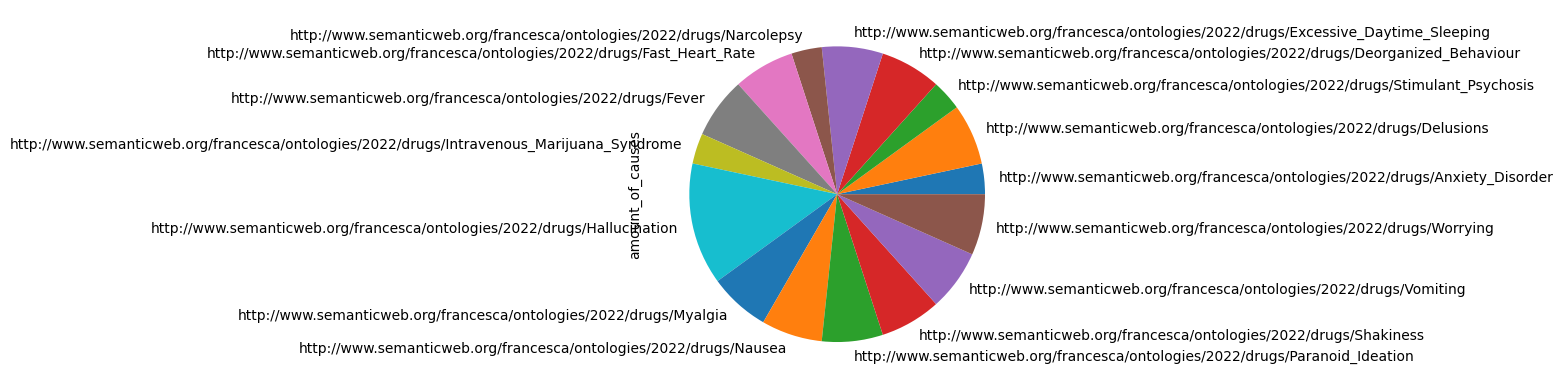

In [15]:
courseload.set_index('disease', inplace=True)
courseload['amount_of_causes'].plot.pie()

<AxesSubplot: ylabel='disease'>

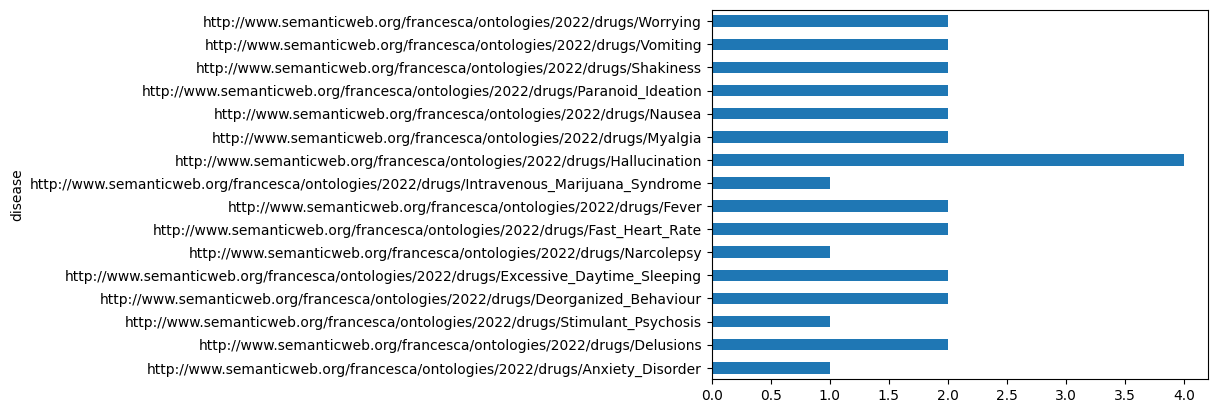

In [16]:
courseload['amount_of_causes'].plot.barh()